In [1]:
import urllib
# dartNumber = 21414
from bs4 import BeautifulSoup
# url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
#         "&type=0&startyear=2011&startmonth=02&startday=24&endyear=2011&endmonth=03&" + 
#         "endday=26&submit=Submit")
# sock = urllib.request.urlopen(url).read().decode("utf-8")

# soup = BeautifulSoup(sock, 'html.parser')

In [2]:
def getCoordinatesFromSoup(soup):
    #Find the "meta" with all coordinates

    for meta in soup.find_all('meta'):
        if 'name' in meta.attrs and meta.attrs['name'] =='description':break

    # Parse its content

    s = meta.attrs['content']
    n,e = s[s.find("(")+1:s.find(")")].split()
    n = float(n[:-1]) if n[-1] == 'N' else -float(n[:-1])
    e = float(e[:-1]) if e[-1] == 'E' else -float(e[:-1])
    return e,n

In [3]:
def readAndWriteDARTBuoy(dartNumber):
    """
        Parses the online website info for the dart buoy,
        saves the time series to a file and returns its soup for further operations
    """
    import urllib
    from bs4 import BeautifulSoup
    url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
            "&type=0&startyear=2011&startmonth=02&startday=24&endyear=2011&endmonth=03&" + 
            "endday=26&submit=Submit")
    sock = urllib.request.urlopen(url).read().decode("utf-8")

    soup = BeautifulSoup(sock, 'html.parser')
    fileName = 'dart{}'.format(dartNumber)
        
    f = open(fileName,'w')
    f.write(soup.textarea.contents[0])
    f.close()
    
    return soup

In [4]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407]

In [5]:
coordinates = {}

In [6]:
for dartNumber in DARTs:
    soup = readAndWriteDARTBuoy(dartNumber)
    coordinates[dartNumber]  = getCoordinatesFromSoup(soup)

In [7]:
coordinates

{21401: (152.583, 42.617),
 21413: (152.132, 30.533),
 21414: (178.219, 48.968),
 21418: (148.645, 38.727),
 21419: (155.717, 44.435),
 51407: (-156.545, 19.57),
 51425: (-176.32, -9.517),
 52403: (145.52, 4.02),
 52406: (164.977, -5.307),
 55012: (158.453, -15.664)}

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

[]

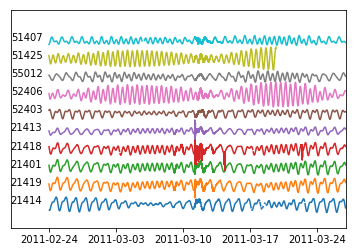

In [9]:
for i,dartNumber in enumerate(DARTs):
    params = {
        'filepath_or_buffer': 'dart{}'.format(dartNumber),
        'skiprows': 2,
        'delim_whitespace': True,
        'names' : 'year month day hour minute second T height'.split(),
        'na_values': 9999
    }
    df = pd.read_csv(**params)
    df['date'] = pd.to_datetime(df['year month day hour minute second'.split()])
    df = df['date height'.split()]

    plt.plot(df['date'],df['height']-df['height'].mean()+i*1.5)
    plt.text(df['date'].min()-pd.Timedelta(days=4),i*1.5,'{}'.format(dartNumber))
plt.ylim(-2,16)
plt.xlim(df['date'].min()-pd.Timedelta(days=4), df['date'].max())
plt.gca().set_yticks([])

# Plot on map

In [13]:
 z = np.loadtxt('bathymetry')

In [17]:
ncols,nrows = z.shape
xll = 135.0
yll = -10.0
cell = 1/60*2
xur = xll + (ncols-1)*cell
yur = yll + (nrows-1)*cell

In [18]:
x = np.linspace(xll,xur,nrows)
y = np.linspace(yll,yur,ncols)

In [22]:
coordinates

{21401: (152.583, 42.617),
 21413: (152.132, 30.533),
 21414: (178.219, 48.968),
 21418: (148.645, 38.727),
 21419: (155.717, 44.435),
 51407: (-156.545, 19.57),
 51425: (-176.32, -9.517),
 52403: (145.52, 4.02),
 52406: (164.977, -5.307),
 55012: (158.453, -15.664)}

In [25]:
x,y

(array([ 135.        ,  135.04447739,  135.08895478, ...,  194.91104522,
         194.95552261,  195.        ]),
 array([-10.        ,  -9.97501852,  -9.95003704, ...,  34.9167037 ,
         34.94168519,  34.96666667]))

(135.0, 195.0, -19.833024744330778, 52.894183209907332)

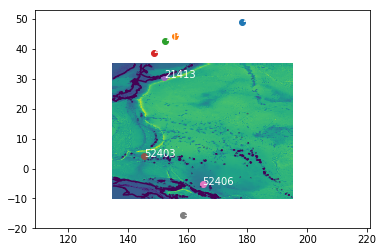

In [32]:
plt.pcolormesh(x,y,z)
plt.contour(x,y,z,[0.0])
for k in coordinates.keys():
    if coordinates[k][0]>0:
        plt.scatter(coordinates[k][0],coordinates[k][1])
        plt.text(coordinates[k][0],coordinates[k][1],'{}'.format(k),color='w')
plt.axis('equal')